In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_list=pd.read_csv('/content/drive/MyDrive/P3_Data/Data/bareily_hourly.csv')
data=pd.DataFrame(df_list)

In [ ]:
data.head()

,Unnamed: 0,Smart_Meter,Timestamp,Electricity_consumption(kWh),Avg_Voltage(Volt),Avg_Current(Amp),Freq(Hz),Date,Year,Month,Week,Day,Dayofyear,Dayofweek,Weekday,Hour,Minute,Quarter,TIME,Season,Time,Time_Category
0,0,BR02,2019-07-10 00:00:00,0.405,242.099,1.7680,50.0240,2019-07-10,2019,7,28,10,191,2,2,0,0,3,00:00:00,Summer,Night,Midnight
1,1,BR02,2019-07-10 01:00:00,0.446,244.241,1.9050,50.0470,2019-07-10,2019,7,28,10,191,2,2,1,0,3,01:00:00,Summer,Night,Midnight
2,2,BR02,2019-07-10 02:00:00,0.447,246.532,1.8895,50.0355,2019-07-10,2019,7,28,10,191,2,2,2,0,3,02:00:00,Summer,Night,Midnight
3,3,BR02,2019-07-10 03:00:00,0.450,248.409,1.8815,50.0585,2019-07-10,2019,7,28,10,191,2,2,3,0,3,03:00:00,Summer,Night,Midnight
4,4,BR02,2019-07-10 04:00:00,0.454,249.703,1.8870,50.0370,2019-07-10,2019,7,28,10,191,2,2,4,0,3,04:00:00,Summer,Night,Midnight


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


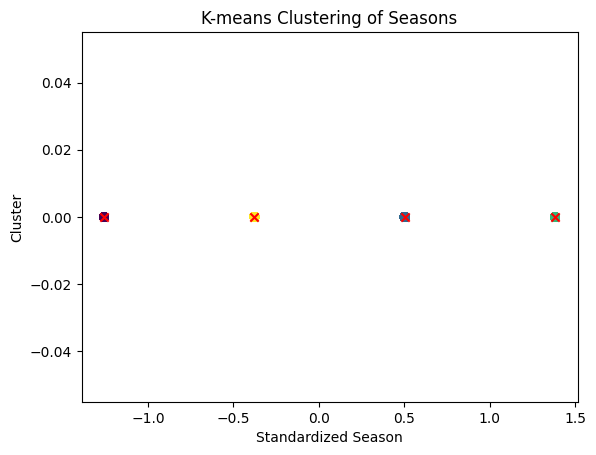

Season_Cluster
0    223800
1    198264
2    176304
3    164952
Name: count, dtype: int64


In [ ]:
encoder = LabelEncoder()
data['Season_Label'] = encoder.fit_transform(data['Season'])

# Assuming 'Season_Label' column is already in numerical format
X = data[['Season_Label']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters (you can use methods like Elbow Method)
# For simplicity, let's assume we know there are 4 seasons
n_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Season_Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 0], [0] * len(X_scaled), c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], [0] * n_clusters, c='red', marker='x')
plt.title('K-means Clustering of Seasons')
plt.xlabel('Standardized Season')
plt.ylabel('Cluster')
plt.show()

# Check the distribution of data points in each cluster
cluster_counts = data['Season_Cluster'].value_counts()
print(cluster_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


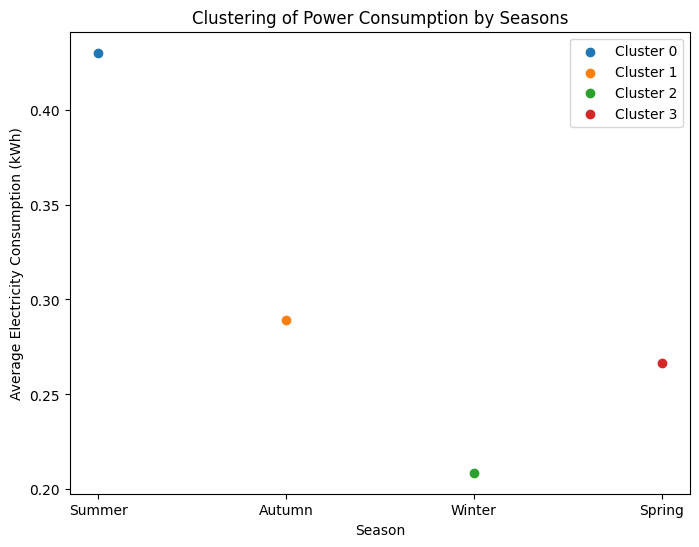

In [ ]:
# Aggregate data by seasons and calculate average power consumption
seasonal_data = data.groupby('Season').agg({'Electricity_consumption(kWh)': 'mean'}).reset_index()

# Assuming 'Season' column is already in numerical format
X = seasonal_data[['Electricity_consumption(kWh)']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters (you can use methods like Elbow Method)
# For simplicity, let's assume we know there are 4 seasons
n_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
seasonal_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    plt.scatter(seasonal_data[seasonal_data['Cluster'] == cluster]['Season'],
                seasonal_data[seasonal_data['Cluster'] == cluster]['Electricity_consumption(kWh)'],
                label=f'Cluster {cluster}')
plt.title('Clustering of Power Consumption by Seasons')
plt.xlabel('Season')
plt.ylabel('Average Electricity Consumption (kWh)')
plt.legend()
plt.show()

In [ ]:
# Separate the data for each cluster
cluster_data_dict = {}
clusters = data['Season_Cluster'].unique()
for cluster in clusters:
    cluster_data_dict[cluster] = data[data['Season_Cluster'] == cluster]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Function to fit ARIMA model to each cluster
def fit_arima_to_cluster(cluster_data):
    # Assuming your dataset has a 'Date' column
    # cluster_data['Date'] = pd.to_datetime(cluster_data['Date'])
    # cluster_data.set_index('Date', inplace=True)

    # Fit ARIMA model
    model = ARIMA(cluster_data['Electricity_consumption(kWh)'], order=(5,2,1))  # Adjust order as needed
    model_fit = model.fit()

    return model_fit

# Iterate over each cluster
cluster_models = {}
for cluster, cluster_data in cluster_data_dict.items():
    model_fit = fit_arima_to_cluster(cluster_data)
    cluster_models[cluster] = model_fit


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

In [ ]:
# Function to forecast future electricity consumption for each cluster
def forecast_future_consumption(model_fit):
    # Make predictions
    future_steps = 10  # Adjust as needed
    forecast = model_fit.forecast(steps=future_steps)

    return forecast

# Dictionary to store forecasts for each cluster
cluster_forecasts = {}

# Iterate over each cluster
for cluster, model_fit in cluster_models.items():
    forecast = forecast_future_consumption(model_fit)
    cluster_forecasts[cluster] = forecast

# Print the forecasts for each cluster
for cluster, forecast in cluster_forecasts.items():
    print(f"Cluster {cluster} Forecast: {forecast}")


Cluster 1 Forecast: 198264    1.415652
198265    1.172677
198266    1.057990
198267    1.022329
198268    1.016019
198269    1.103672
198270    1.127499
198271    1.116615
198272    1.102272
198273    1.093611
Name: predicted_mean, dtype: float64
Cluster 0 Forecast: 223800    0.323164
223801    0.347231
223802    0.350156
223803    0.338924
223804    0.338022
223805    0.334552
223806    0.335614
223807    0.337685
223808    0.338389
223809    0.337882
Name: predicted_mean, dtype: float64
Cluster 2 Forecast: 176304    0.056965
176305    0.058876
176306    0.056881
176307    0.055656
176308    0.054272
176309    0.055297
176310    0.055632
176311    0.055844
176312    0.055770
176313    0.055644
Name: predicted_mean, dtype: float64
Cluster 3 Forecast: 164952    0.042859
164953    0.041728
164954    0.039730
164955    0.038454
164956    0.038828
164957    0.039196
164958    0.039569
164959    0.039602
164960    0.039429
164961    0.039260
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-pa

In [ ]:
# Define the number of future steps
future_steps = 10  # Adjust as needed

# Combine the forecasts from all clusters for the final prediction
combined_forecast = np.zeros((future_steps,))  # Initialize an array to store the combined forecast

# Iterate over each cluster and add its forecast to the combined forecast
for forecast in cluster_forecasts.values():
    combined_forecast += forecast

# Take the average of the forecasts from all clusters
combined_forecast /= len(cluster_forecasts)

# Print the combined forecast
print("Combined Forecast:", combined_forecast)

Combined Forecast: 198264   NaN
198265   NaN
198266   NaN
198267   NaN
198268   NaN
198269   NaN
198270   NaN
198271   NaN
198272   NaN
198273   NaN
Name: predicted_mean, dtype: float64


In [ ]:
import numpy as np

# Combine the forecasts from all clusters for the final prediction
combined_forecast = np.zeros((future_steps,))  # Initialize an array to store the combined forecast

# Iterate over each cluster and add its forecast to the combined forecast
for forecast in cluster_forecasts.values():
    combined_forecast += forecast

# Take the average of the forecasts from all clusters
combined_forecast /= len(cluster_forecasts)

# Print the combined forecast
print("Combined Forecast:", combined_forecast)



Combined Forecast: 198264   NaN
198265   NaN
198266   NaN
198267   NaN
198268   NaN
198269   NaN
198270   NaN
198271   NaN
198272   NaN
198273   NaN
Name: predicted_mean, dtype: float64


<Figure size 1000x600 with 0 Axes>

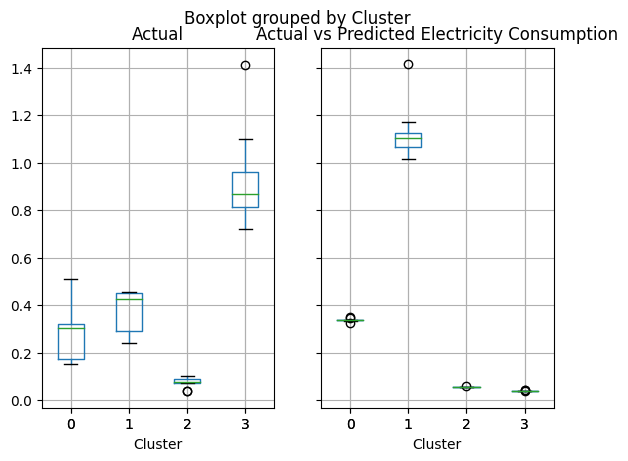

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to create a dataframe containing actual and predicted values for each cluster
def create_dataframe_for_boxplot(cluster_data_dict, cluster_forecasts):
    data = {'Cluster': [], 'Actual': [], 'Predicted': []}
    for cluster, cluster_data in cluster_data_dict.items():
        actual_values = cluster_data['Electricity_consumption(kWh)'].values
        predicted_values = cluster_forecasts[cluster]

        # Ensure the number of actual and predicted values is the same
        min_length = min(len(actual_values), len(predicted_values))
        actual_values = actual_values[:min_length]
        predicted_values = predicted_values[:min_length]

        data['Cluster'].extend([cluster] * min_length)
        data['Actual'].extend(actual_values)
        data['Predicted'].extend(predicted_values)
    return pd.DataFrame(data)

# Create dataframe for box plot
boxplot_df = create_dataframe_for_boxplot(cluster_data_dict, cluster_forecasts)

# Plot box plot
plt.figure(figsize=(10, 6))
boxplot_df.boxplot(column=['Actual', 'Predicted'], by='Cluster')
plt.title('Actual vs Predicted Electricity Consumption')
plt.xlabel('Cluster')
plt.ylabel('Electricity Consumption (kWh)')
plt.show()


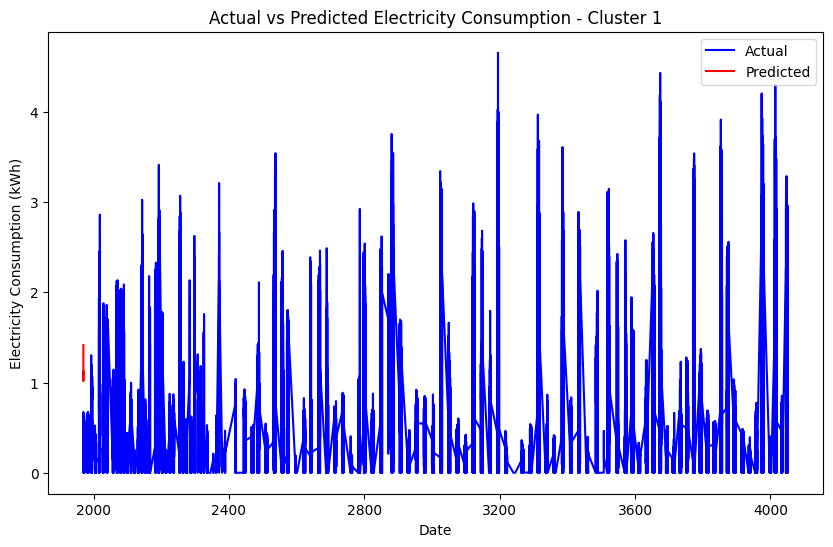

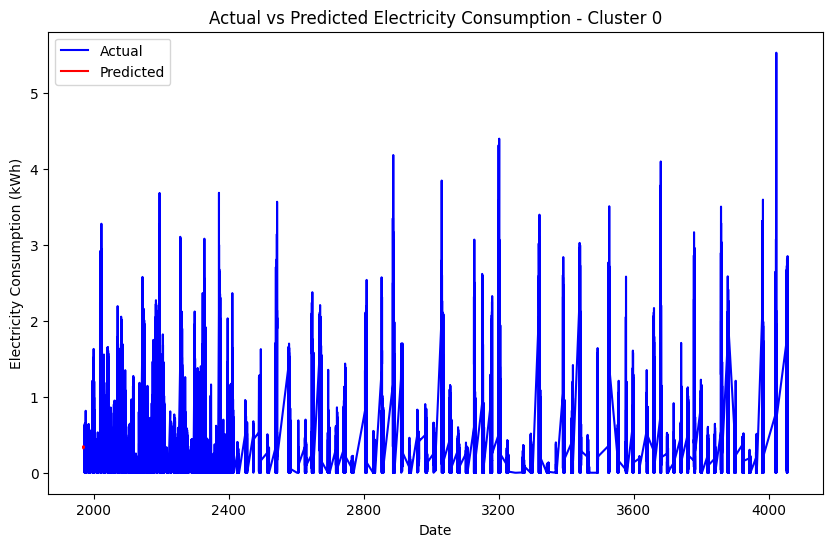

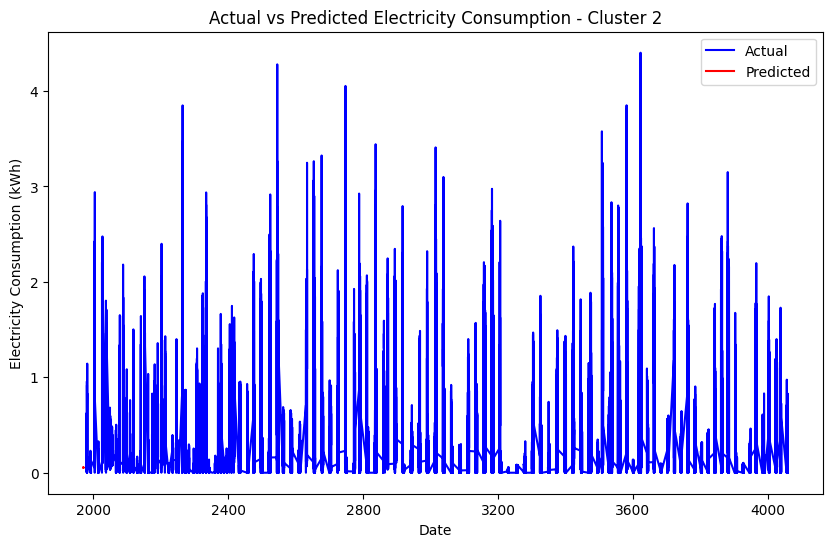

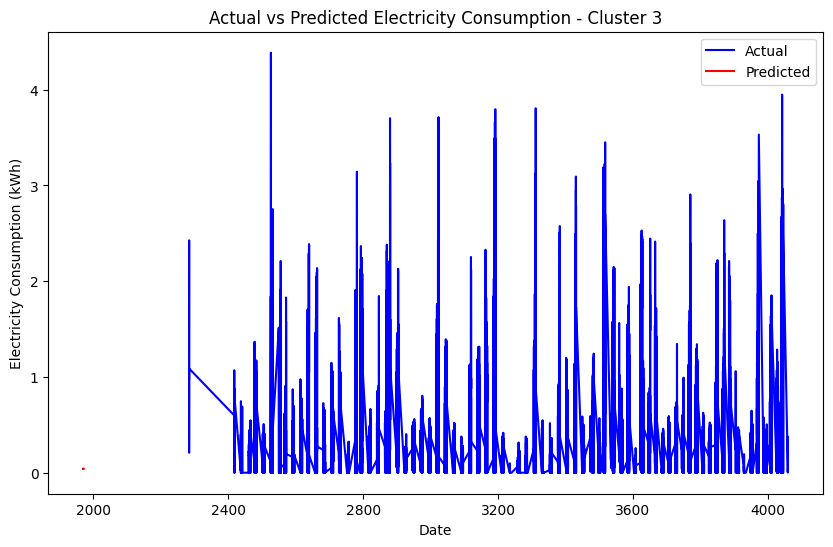

In [ ]:
import matplotlib.pyplot as plt

# Iterate over each cluster to plot actual vs predicted values
for cluster, cluster_data in cluster_data_dict.items():
    actual_values = cluster_data['Electricity_consumption(kWh)']
    predicted_values = cluster_forecasts[cluster]

    plt.figure(figsize=(10, 6))
    plt.plot(cluster_data.index, actual_values, label='Actual', color='blue')
    plt.plot(pd.date_range(start=cluster_data.index[-1], periods=len(predicted_values)), predicted_values, label='Predicted', color='red')
    plt.title(f'Actual vs Predicted Electricity Consumption - Cluster {cluster}')
    plt.xlabel('Date')
    plt.ylabel('Electricity Consumption (kWh)')
    plt.legend()
    plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Dictionary to store accuracy metrics for each cluster
accuracy_metrics = {}

# Iterate over each cluster
for cluster, cluster_data in cluster_data_dict.items():
    actual_values = cluster_data['Electricity_consumption(kWh)'].values
    forecast_values = cluster_forecasts[cluster]

    # Ensure that the lengths of actual and forecast values match
    min_length = min(len(actual_values), len(forecast_values))
    actual_values = actual_values[:min_length]
    forecast_values = forecast_values[:min_length]

    # Calculate accuracy metrics
    mae = mean_absolute_error(actual_values, forecast_values)
    mse = mean_squared_error(actual_values, forecast_values)
    rmse = np.sqrt(mse)

    # Store accuracy metrics in dictionary
    accuracy_metrics[cluster] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Print accuracy metrics for each cluster
for cluster, metrics in accuracy_metrics.items():
    print(f"Cluster {cluster} - MAE: {metrics['MAE']}, MSE: {metrics['MSE']}, RMSE: {metrics['RMSE']}")


Cluster 1 - MAE: 0.7484335363797886, MSE: 0.5799936835696935, RMSE: 0.7615731636354406
Cluster 0 - MAE: 0.09758550641109578, MSE: 0.015000840942886201, RMSE: 0.12247792022599911
Cluster 2 - MAE: 0.02641156609149046, MSE: 0.0008199202557596689, RMSE: 0.028634249697864773
Cluster 3 - MAE: 0.889834331792567, MSE: 0.8274490116558295, RMSE: 0.9096422437726985


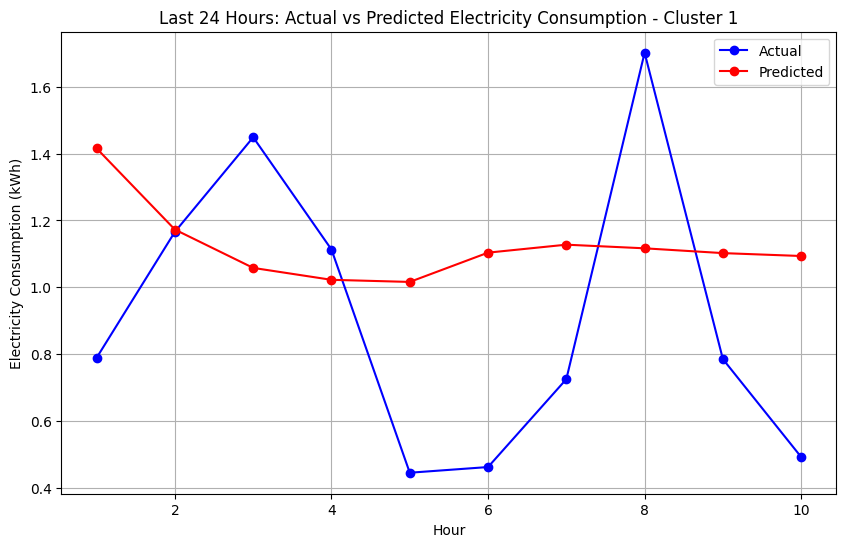

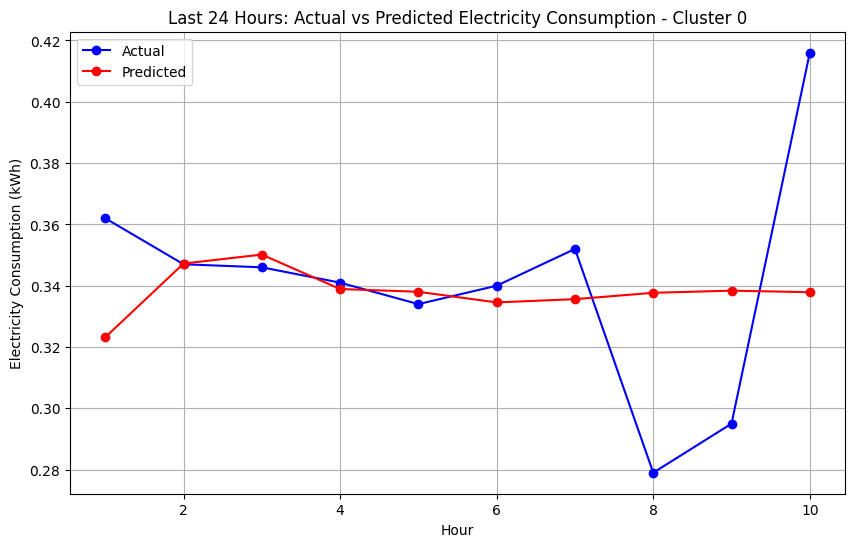

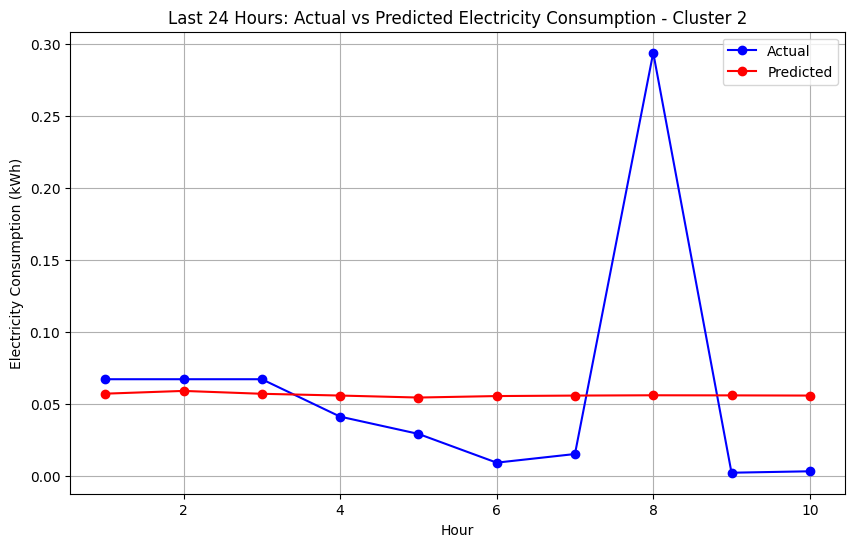

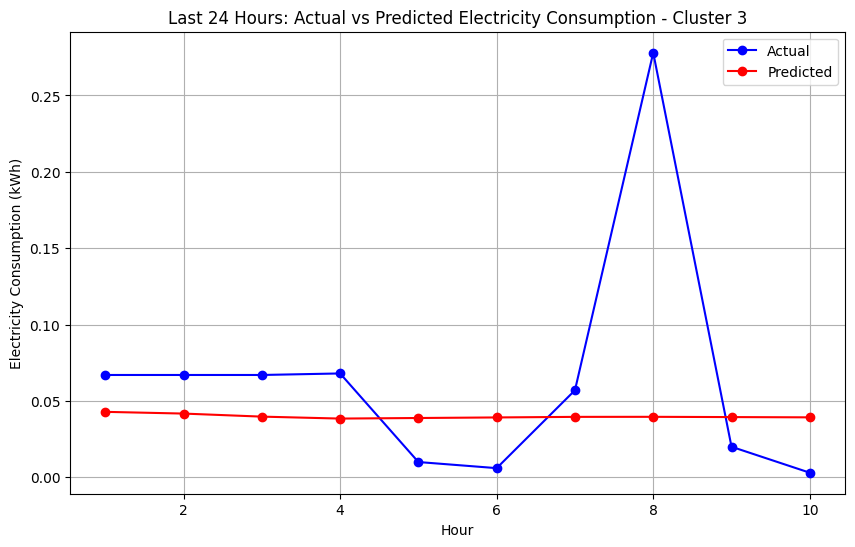

In [ ]:
import matplotlib.pyplot as plt

# Define the number of hours to plot
hours_to_plot = 24

# Iterate over each cluster to plot actual vs predicted values
for cluster, cluster_data in cluster_data_dict.items():
    actual_values = cluster_data['Electricity_consumption(kWh)']
    predicted_values = cluster_forecasts[cluster]

    # Get the last 24 hours of data
    actual_values_24h = actual_values[-hours_to_plot:]
    predicted_values_24h = predicted_values[-hours_to_plot:]

    # Ensure both arrays have the same length
    min_length = min(len(actual_values_24h), len(predicted_values_24h))
    actual_values_24h = actual_values_24h[:min_length]
    predicted_values_24h = predicted_values_24h[:min_length]

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, min_length + 1), actual_values_24h, label='Actual', color='blue', marker='o')
    plt.plot(range(1, min_length + 1), predicted_values_24h, label='Predicted', color='red', marker='o')
    plt.title(f'Last 24 Hours: Actual vs Predicted Electricity Consumption - Cluster {cluster}')
    plt.xlabel('Hour')
    plt.ylabel('Electricity Consumption (kWh)')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    # Ensure both arrays have the same length
    min_length = min(len(actual), len(predicted))
    actual, predicted = actual[:min_length], predicted[:min_length]
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Dictionary to store MAPE for each cluster
mape_values = {}

# Iterate over each cluster
for cluster, cluster_data in cluster_data_dict.items():
    actual_values = cluster_data['Electricity_consumption(kWh)']
    predicted_values = cluster_forecasts[cluster]

    # Calculate MAPE
    mape = calculate_mape(actual_values, predicted_values)

    # Store MAPE in dictionary
    mape_values[cluster] = mape

# Print MAPE for each cluster
for cluster, mape in mape_values.items():
    print(f"Cluster {cluster} - MAPE: {mape:.2f}%")


Cluster 1 - MAPE: 218.75%
Cluster 0 - MAPE: 48.30%
Cluster 2 - MAPE: 35.46%
Cluster 3 - MAPE: 95.58%


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define the range of orders to try
p_values = range(5)  # Example: Trying orders 0, 1, 2
d_values = range(5)  # Example: Trying orders 0, 1, 2
q_values = range(5)  # Example: Trying orders 0, 1, 2

best_score = float('inf')
best_order = None

# Iterate over different orders
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)

            # Fit ARIMA model
            try:
                model = ARIMA(endog=train_data, order=order)
                model_fit = model.fit()

                # Evaluate model
                forecast = model_fit.forecast(steps=len(test_data))
                rmse = mean_squared_error(test_data, forecast, squared=False)

                # Update best score and order if current model is better
                if rmse < best_score:
                    best_score = rmse
                    best_order = order

            except:
                continue

print(f'Best order: {best_order}, RMSE: {best_score}')

Best order: None, RMSE: inf
